In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host,
                                                           postgres_port, postgres_db))
usaed_df = pd.read_sql_query('select * from useducation', con = engine)

## Determine all the variable types and find the fraction of the missing values for each variable.

In [3]:
usaed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

## Missing value percentages

In [4]:
usaed_df.isnull().sum()*100/usaed_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## Last 4 columns have more than 60% of missing data and we will not be using those variables in the data

## Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [5]:
column_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

In [6]:
us_ed_df = usaed_df.copy()

In [7]:
for col in column_list:
    us_ed_df.loc[:, col] = us_ed_df.loc[:, col].fillna(us_ed_df.loc[:, col].mean())
    

In [8]:
us_ed_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                            0
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                 0
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                       0
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                      0
GRADES_9_12_G                     0
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [9]:
us_ed_df.shape

(1492, 25)

In [10]:
us_ed_df.drop(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis =1, inplace = True)

In [11]:
us_ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 21 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

## Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [12]:
educ_df = usaed_df.copy()
years = educ_df['YEAR'].unique() 

In [13]:
years

array([1992, 2001, 1993, 2016, 1994, 1995, 1996, 1997, 1998, 1999, 2017,
       2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [14]:
for col in column_list:
    for year in years:
        educ_df.loc[educ_df['YEAR'] == year, col ] = educ_df.loc[educ_df['YEAR'] == year, col].fillna(
            educ_df[educ_df['YEAR'] == year][ col].mean())

In [15]:
educ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1385 non-null float64
TOTAL_REVENUE                   1441 non-null float64
FEDERAL_REVENUE                 1441 non-null float64
STATE_REVENUE                   1441 non-null float64
LOCAL_REVENUE                   1441 non-null float64
TOTAL_EXPENDITURE               1441 non-null float64
INSTRUCTION_EXPENDITURE         1441 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1441 non-null float64
OTHER_EXPENDITURE               1385 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1441 non-null float64
GRADES_PK_G                     1390 non-null float64
GRADES_KG_G                     1390 non-null float64
GRADES_4_G                      1390 non-null float64
GRADES_8_G                      1

##  This time, fill in the missing values using interpolation (extrapolation).

In [16]:
us2 = usaed_df.copy()

In [17]:
for col in column_list:
    us2.loc[:, col] = us2.loc[:, col].fillna(us2.loc[:,col].interpolate())

In [18]:
us2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1456 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

In [19]:
education4_df = usaed_df.copy()

In [20]:
for col in column_list:
    education4_df.loc[:, col] = education4_df.loc[:, col].interpolate()

In [21]:
education4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1456 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1456 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

In [22]:
education4_df = usaed_df.copy()

In [23]:
for col in column_list:
    education4_df.loc[:, col] = education4_df.loc[:, col].interpolate(limit_direction = 'both')

In [24]:
education4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1

##  Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [25]:
datasets = [us_ed_df , educ_df, us2, education4_df]
for i in datasets:
    print(i.describe())

              YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1492.000000  1.492000e+03   1.492000e+03     1.492000e+03   
mean   2004.433646  9.159308e+05   9.092082e+06     7.663723e+05   
std       7.393983  9.667725e+05   1.087818e+07     1.060702e+06   
min    1992.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1998.000000  3.150940e+05   2.546261e+06     2.170200e+05   
50%    2004.000000  8.204140e+05   6.359310e+06     5.167410e+05   
75%    2011.000000  9.211780e+05   9.276958e+06     7.663723e+05   
max    2017.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.492000e+03   1.492000e+03       1.492000e+03   
mean    4.216553e+06   4.109157e+06       9.196681e+06   
std     5.133895e+06   5.078230e+06       1.109393e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.356434e+06   9.447962e+05       2.523968e+06   
50%     3.127639e+06   2.697257e+06    

              YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1492.000000  1.492000e+03   1.492000e+03     1.492000e+03   
mean   2004.433646  9.838759e+05   1.111164e+07     8.922691e+05   
std       7.393983  1.006773e+06   1.200155e+07     1.106788e+06   
min    1992.000000  4.386600e+04   4.656500e+05     3.102000e+04   
25%    1998.000000  2.821195e+05   2.546261e+06     2.170200e+05   
50%    2004.000000  7.373935e+05   6.351760e+06     5.165190e+05   
75%    2011.000000  1.595024e+06   1.803650e+07     1.411794e+06   
max    2017.000000  6.307022e+06   8.921726e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.492000e+03   1.492000e+03       1.492000e+03   
mean    4.913351e+06   5.306024e+06       1.114374e+07   
std     5.423675e+06   5.900909e+06       1.212433e+07   
min     0.000000e+00   2.209300e+04       4.816650e+05   
25%     1.356434e+06   9.447962e+05       2.523968e+06   
50%     3.119414e+06   2.650904e+06    

In [26]:
us2.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [27]:
us2.drop(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis =1, inplace = True)

In [28]:
us2.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G'],
      dtype='object')

## Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

In [32]:
us2.columns = us2.columns.str.lower()

In [33]:
us2.columns

Index(['primary_key', 'state', 'year', 'enroll', 'total_revenue',
       'federal_revenue', 'state_revenue', 'local_revenue',
       'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'grades_pk_g', 'grades_kg_g',
       'grades_4_g', 'grades_8_g', 'grades_12_g', 'grades_1_8_g',
       'grades_9_12_g', 'grades_all_g'],
      dtype='object')

Text(0.5, 1.0, 'Total Expenditure with 1.5 whisker')

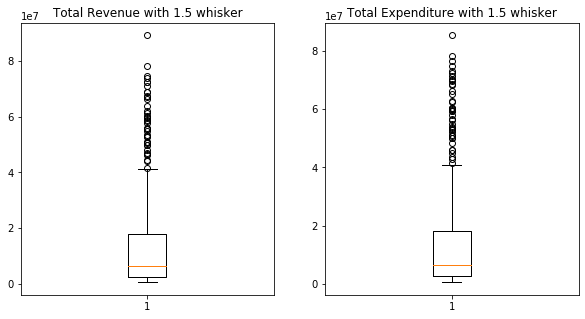

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(us2.total_revenue)
plt.title('Total Revenue with 1.5 whisker')
plt.subplot(1,2,2)
plt.boxplot(us2.total_expenditure)
plt.title('Total Expenditure with 1.5 whisker')

## it appears that both the columns have a lot of outliers

## 2. f you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [57]:
from scipy.stats.mstats import winsorize
winsorized_revenue = winsorize(us2['total_revenue'], (0, 0.05))
winsorized_exp = winsorize(us2['total_expenditure'], (0, 0.05))

Text(0.5, 1.0, 'WINSORIZED EXPENDITURE')

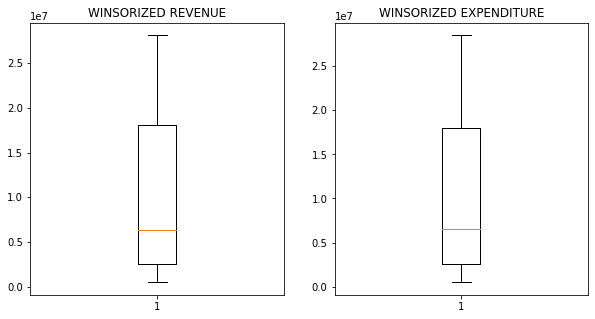

In [60]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue)
plt.title('WINSORIZED REVENUE')
plt.subplot(1,2,2)
plt.boxplot(winsorized_exp)
plt.title('WINSORIZED EXPENDITURE')

## 3.Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [61]:
us2['budget_deficit'] =  us2['total_revenue']-us2['total_expenditure']

In [62]:
us2.head()

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,capital_outlay_expenditure,grades_pk_g,grades_kg_g,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,budget_deficit
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,25087.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,77103.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,-878807.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a248dbcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a249126a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a248db908>],
 'medians': [<matplotlib.lines.Line2D at 0x1a24912d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a24912e10>],
 'means': []}

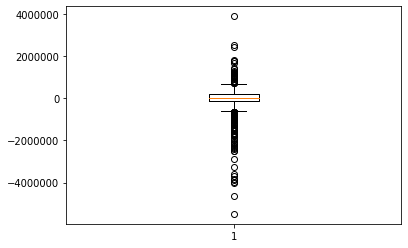

In [69]:
plt.boxplot(us2['budget_deficit'])

In [77]:
winsorized_budgetdeficit = winsorize(us2['budget_deficit'], (0.05,0.05))


{'whiskers': [<matplotlib.lines.Line2D at 0x1a23bb1d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23bb76d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23bb1c18>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23bb7d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a23bb7e48>],
 'means': []}

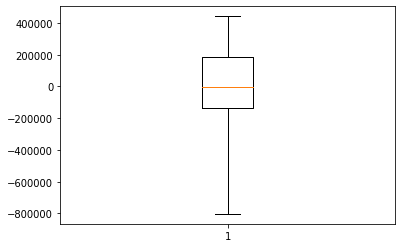

In [80]:
plt.boxplot(winsorized_budgetdeficit, whis =5)

In [84]:
new_bud = winsorized_revenue - winsorized_exp

{'whiskers': [<matplotlib.lines.Line2D at 0x1a243abf60>,
 'caps': [<matplotlib.lines.Line2D at 0x1a243d1630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a243abb70>],
 'medians': [<matplotlib.lines.Line2D at 0x1a243d1cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a243d1da0>],
 'means': []}

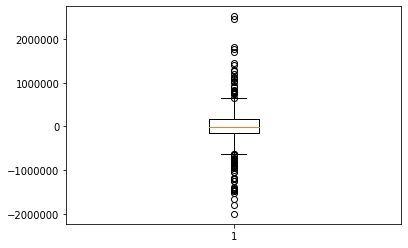

In [85]:
plt.boxplot(new_bud)

In [86]:
wins_new_bud = winsorize(new_bud, (0.05, 0.05))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a23f39278>,
 'caps': [<matplotlib.lines.Line2D at 0x1a23f27438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a23f39390>],
 'medians': [<matplotlib.lines.Line2D at 0x1a23f3d160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a23f3d198>],
 'means': []}

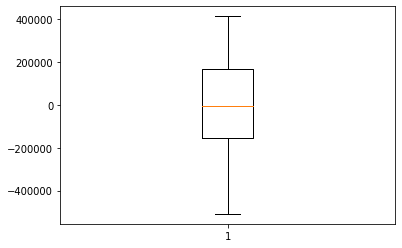

In [88]:
plt.boxplot(wins_new_bud, whis = 5)

## 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [90]:
budget_deficit = us2['budget_deficit']

In [92]:
pd.DataFrame({'original_budget': budget_deficit, 'winsorized_budget1': winsorized_budgetdeficit, 'winsorized_budget2': wins_new_bud}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,1.492000e+03,1492.000000,1492.000000
mean,-3.209622e+04,-5852.697051,5979.659517
std,5.607748e+05,315970.963721,268064.378117
min,-5.487742e+06,-803208.000000,-509360.000000
25%,-1.368148e+05,-136814.750000,-152551.500000
50%,-5.355000e+02,-535.500000,-3443.500000
75%,1.876285e+05,187628.500000,168423.500000
max,3.897129e+06,442351.000000,414013.000000


## 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

### Sometimes, differencing may help us to eliminate the outliers. So, it's better to first create a variable from the originals and then to apply outlier elimination techniques next. Hence, the approach in the third question is more desirable in most of the cases.
